In [24]:
import openai
import base64
from IPython.display import display, Image
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())
client = openai.Client()

In [25]:
def encode_image(caminho_imagem):
    with open(caminho_imagem, 'rb' ) as img:
        return base64.b64encode(img.read()).decode('utf-8')

In [26]:
def getSerialNumber(image_path : str):
    base_64_img = encode_image(image_path)

    prompt = """
    Observe a foto da caixa recebida e informe o número de série do produto. 
    O numero de série está indicado por "SN:, uma sequêcia de números. 
    Sua resposta deve ser apenas o número de série, sem outros textos ou explicações.
    Se não houver número de série, responda "Não encontrado".
    """
    
    resposta = client.chat.completions.create(
        model='gpt-4o',
        messages=[{
            'role': 'user',
            'content': [
                {'type': 'text', 'text': prompt},
                {'type': 'image_url', 'image_url': 
                {'url': f'data:image/jpg;base64,{base_64_img}'}}
            ]
        }],
        max_tokens=1000,
    )

    return(resposta.choices[0].message.content)

In [27]:
ImageSN = [
  {
    'path': '0251909608388_side.png',
    'SN': '0251909608388'
  },
  {
    'path': '0294810736965_side.png',
    'SN': '0294810736965'
  },
  {
    'path': '0567061130190_side.png',
    'SN': '0567061130190'
  },
  {
    'path': '0591392882740_side.png',
    'SN': '0591392882740'
  },
  {
    'path': '0655090006990_side.png',
    'SN': '0655090006990'
  },
  {
    'path': '0702739449714_side.png',
    'SN': '0702739449714'
  }
]

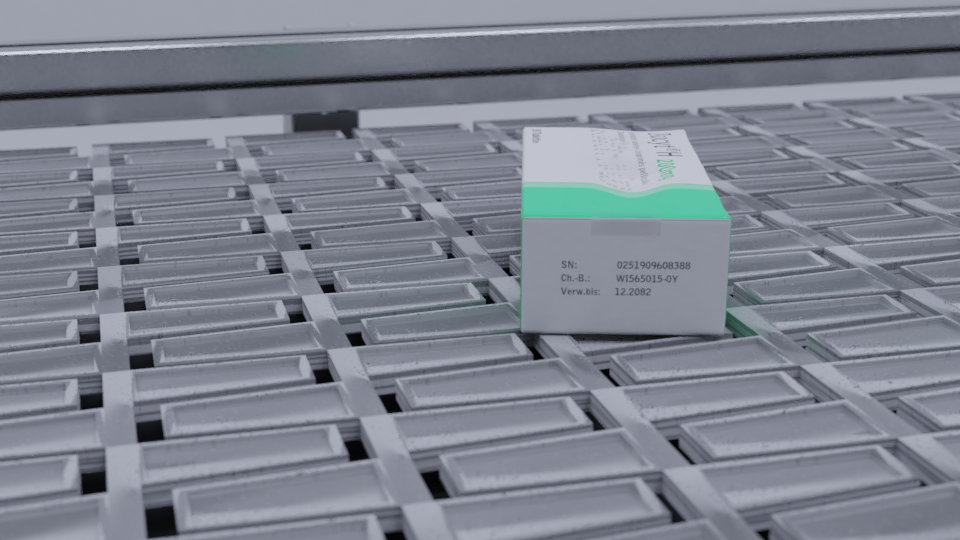

Imagem: 0251909608388_side.png
Número de série esperado: 0251909608388
Número de série encontrado: 0251909608388
Número de série encontrado corretamente!
--------------------------------------------------


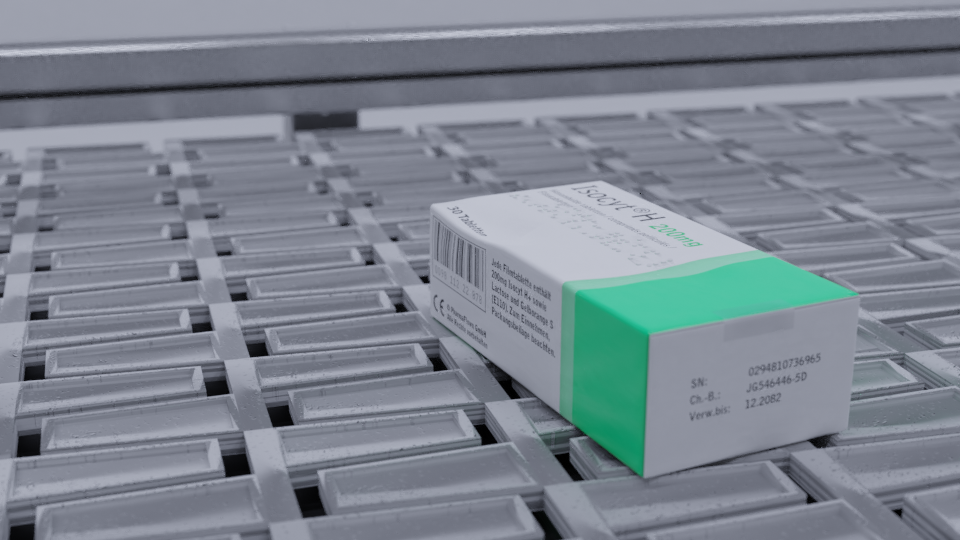

Imagem: 0294810736965_side.png
Número de série esperado: 0294810736965
Número de série encontrado: 0294810736965
Número de série encontrado corretamente!
--------------------------------------------------


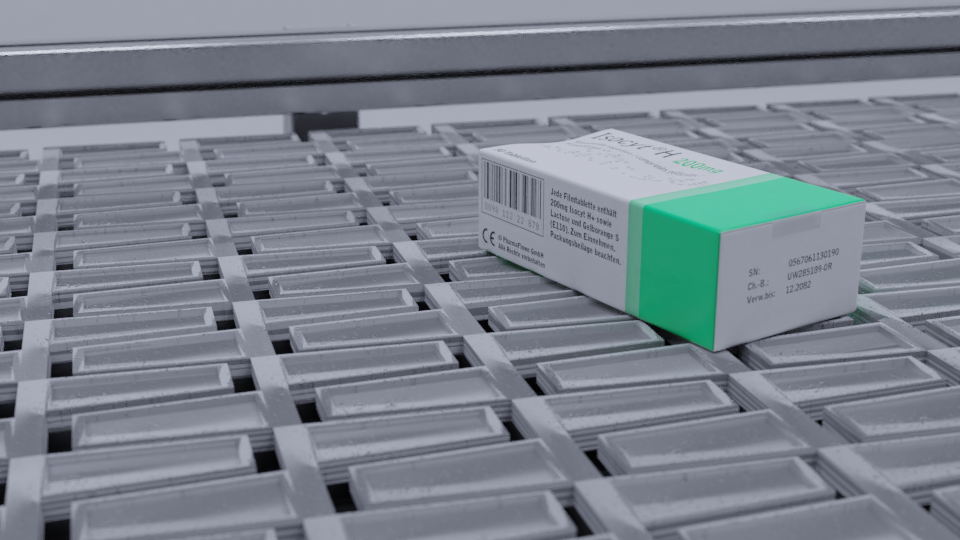

Imagem: 0567061130190_side.png
Número de série esperado: 0567061130190
Número de série encontrado: 0567061130190
Número de série encontrado corretamente!
--------------------------------------------------


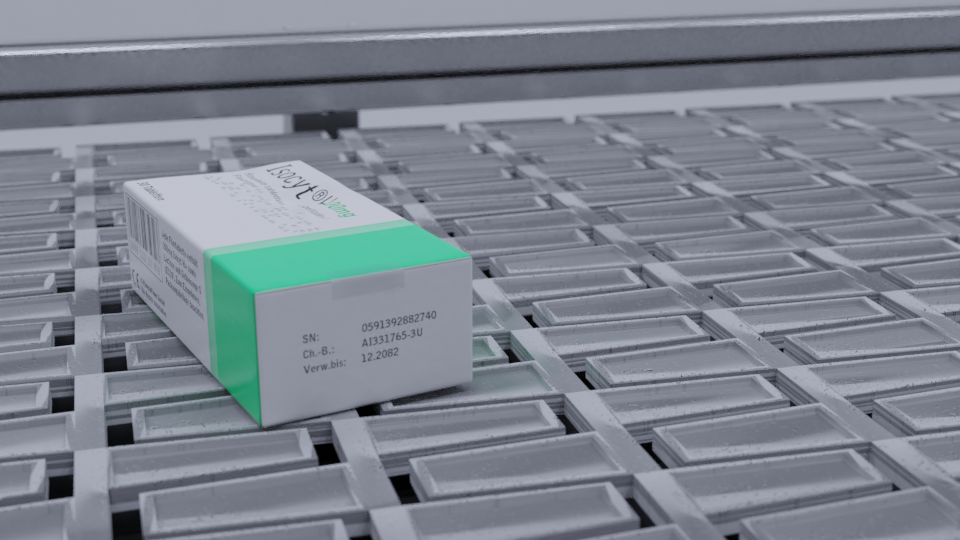

Imagem: 0591392882740_side.png
Número de série esperado: 0591392882740
Número de série encontrado: 0591392882740
Número de série encontrado corretamente!
--------------------------------------------------


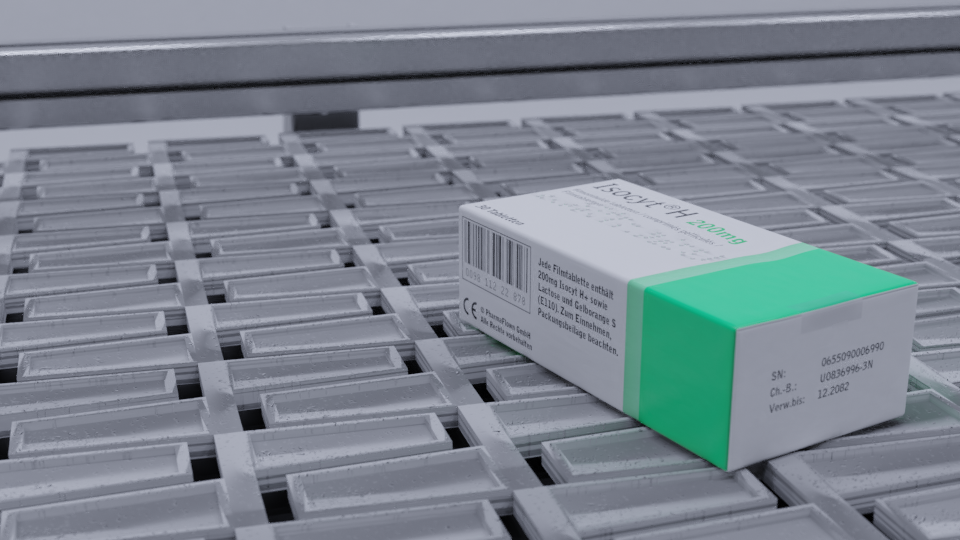

Imagem: 0655090006990_side.png
Número de série esperado: 0655090006990
Número de série encontrado: 065590006990
Número de série não encontrado ou incorreto.
--------------------------------------------------


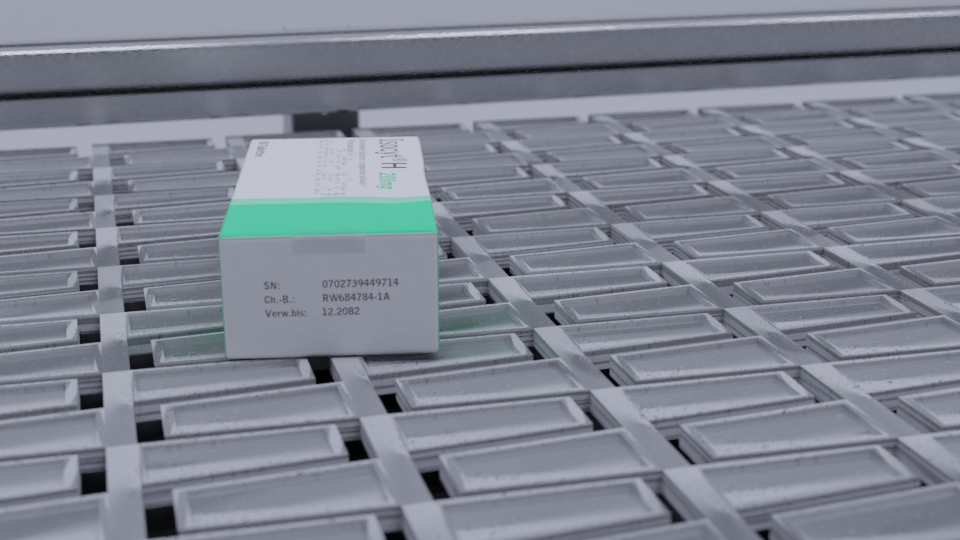

Imagem: 0702739449714_side.png
Número de série esperado: 0702739449714
Número de série encontrado: 0702739449714
Número de série encontrado corretamente!
--------------------------------------------------


In [28]:
for image in ImageSN:
    display(Image(filename=image['path']))
    print(f"Imagem: {image['path']}")
    print(f"Número de série esperado: {image['SN']}")
    print(f"Número de série encontrado: {getSerialNumber(image['path'])}")
    if getSerialNumber(image['path']) == image['SN']:
        print("Número de série encontrado corretamente!")
    else:
        print("Número de série não encontrado ou incorreto.")
    print("-" * 50)